In [1]:
#!pip install -U ydata-profiling

In [2]:
#importing useful libraies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

# ASSESSING DATA

In [3]:
# reading in data
data = pd.read_csv(r"C:\Users\gideonokomayin\Desktop\NEW CONNECTTEL CHURN  PREDICTION\Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#statistical distributon of num_feat
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#statistical distribution of cat_feat
data.describe(exclude=['int64','float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [7]:
#checking for missing features
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#checking for data duplicates
data.duplicated().sum()

0

## Observation

- From the data summary we observed that CustomerID (a categorical feature) is a unique identifier since it returned the entire count of 7043 as unique. This shows a large number of unique categories (i.e. high cardinality). We may consider dropping this feature later as we progress into ML after considering other factors and its level of importance.
- There are 11 missing values in the TotalCharges features 
- The target varable (Churn) has 2 unique values

In [9]:
#Churn
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## EDA
#### Univariate Analysis

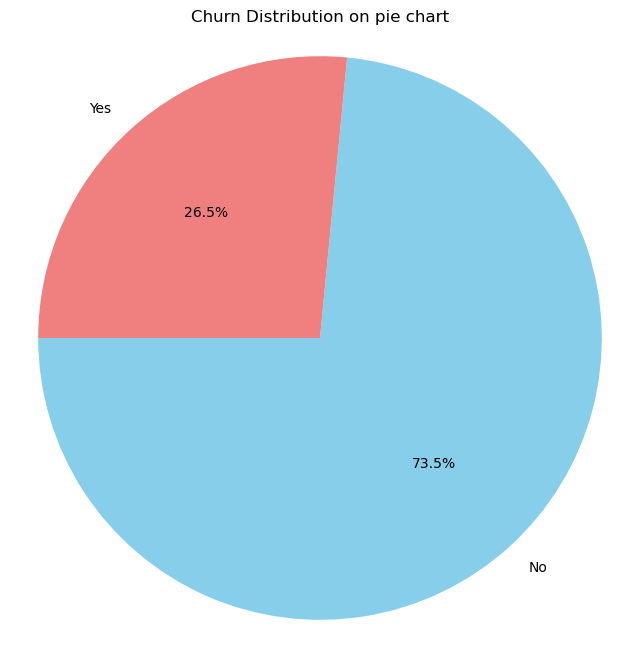

In [10]:
#target(dependant variable)
# Count the number of each category
churn_counts = data['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=180, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution on pie chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

### Observation

- This analysis shows that over one-quarter(above 25%) of the entire customers had cancelled there services


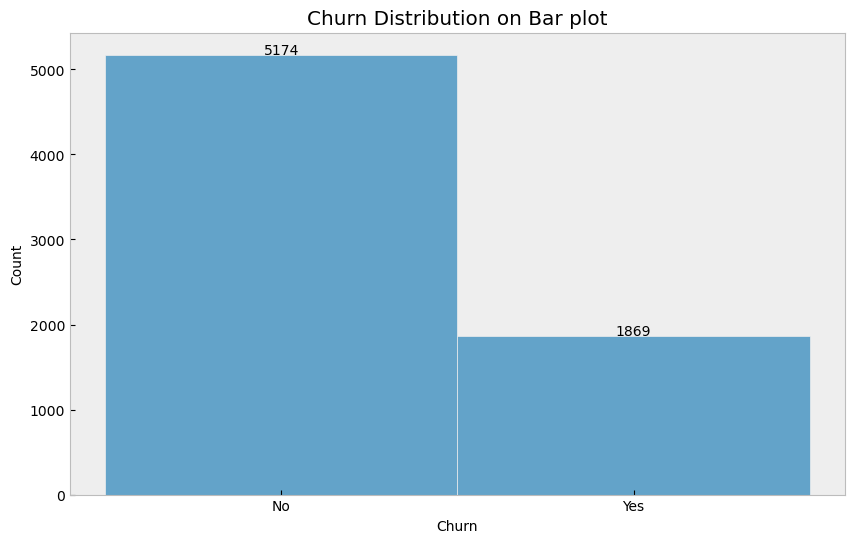

In [11]:
plt.style.use('bmh')
plt.figure(figsize=(10, 6))

# Create a histogram
ax = sb.histplot(data['Churn'])

# Remove grid lines
ax.grid(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Churn Distribution on Bar plot')

plt.show()


#### Observation
- Churn: A majority of the customers have not churned, indicating that the dataset is somewhat imbalanced with respect to the target variable. A significant portion, however, has churned, which is the subset of interest.

In [12]:
#creating cat_features & num_feats for easy analysis
num_feat = data.select_dtypes(include=['float64','int64'])
cat_feat = data.select_dtypes(include=['object'])

In [13]:
cat_feat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [14]:
# Function to add data labels on bar plots
def add_labels_on_bar(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Text(0.5, 1.0, 'Distribution of InternetService')

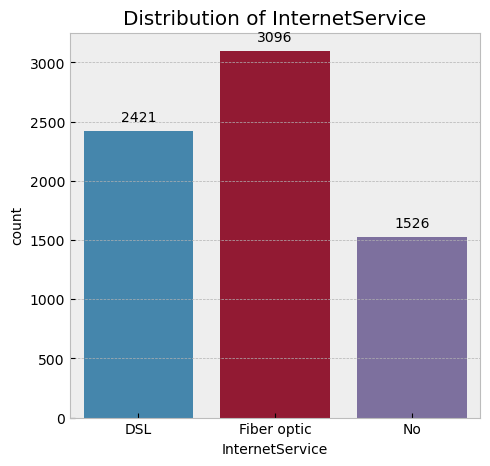

In [15]:
plt.figure(figsize=(18, 5)) 
    
# Distribution of InternetService
ax2 = plt.subplot(1, 3, 1)
sb.countplot(data=data, x='InternetService', ax=ax2)
add_labels_on_bar(ax2)
plt.title('Distribution of InternetService')

#### Observation
- InternetService: A significant number of customers use the Fiber optic service, followed by DSL. A smaller portion doesn't have internet service.

Text(0.5, 1.0, 'Distribution of gender')

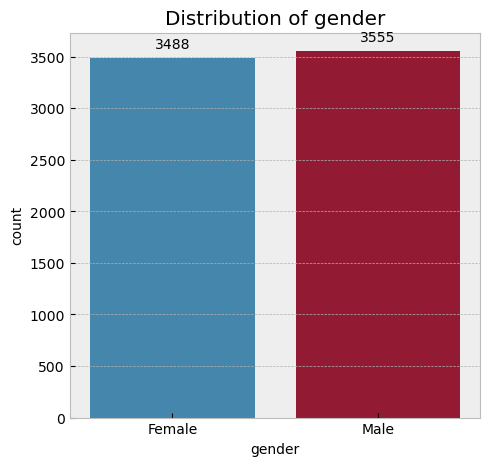

In [16]:
plt.figure(figsize=(18, 5)) 

ax3 = plt.subplot(1, 3, 3)
sb.countplot(data=data, x='gender', ax=ax3)
add_labels_on_bar(ax3)
plt.title('Distribution of gender')

#### Observation
- Gender: The dataset is balanced with almost equal distributions of males and females.

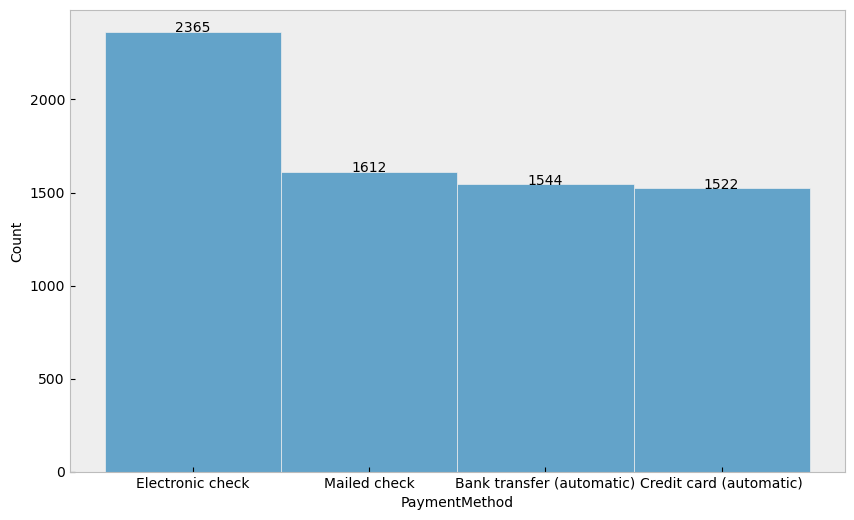

In [17]:
#univariate distributions for Payment methods
plt.style.use('bmh')
plt.figure(figsize=(10, 6))

# Create a histogram
ax = sb.histplot(data['PaymentMethod'])

# Remove grid lines
ax.grid(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

#### Observation
- Payment Method: A significant number of customers (2365) make payment through Electronic check, followed by Mailed check, Bank Transfer (Automatic) and then Credit card (Automatic).

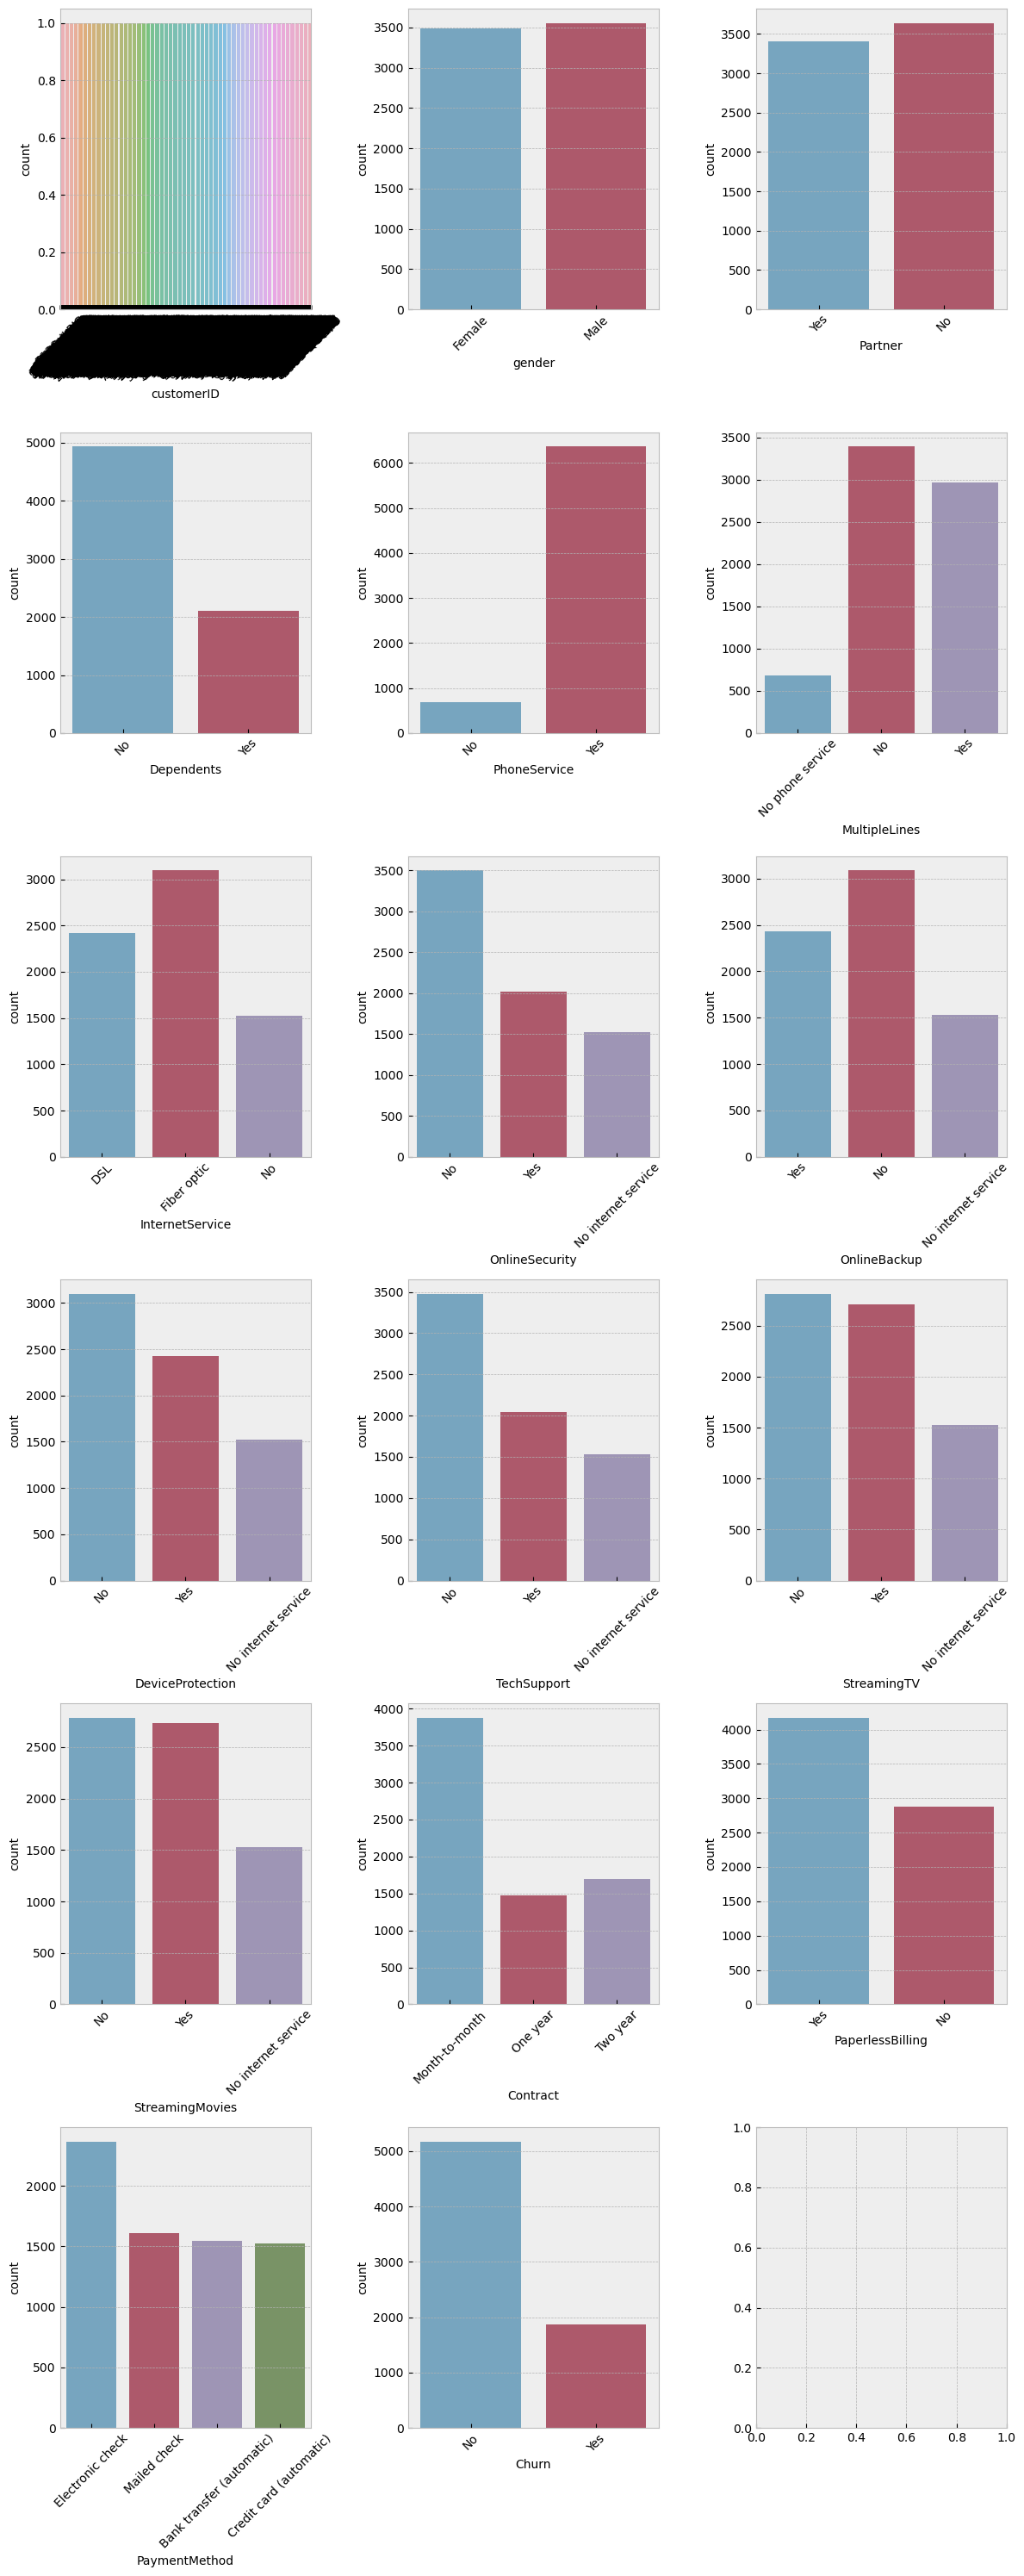

In [18]:
#univariate plots of the other categorical features
fig, axes = plt.subplots(round(len(cat_feat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=cat_feat.columns[i], alpha=0.7, data=cat_feat, ax=ax)

fig.tight_layout();

In [19]:
num_feat.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


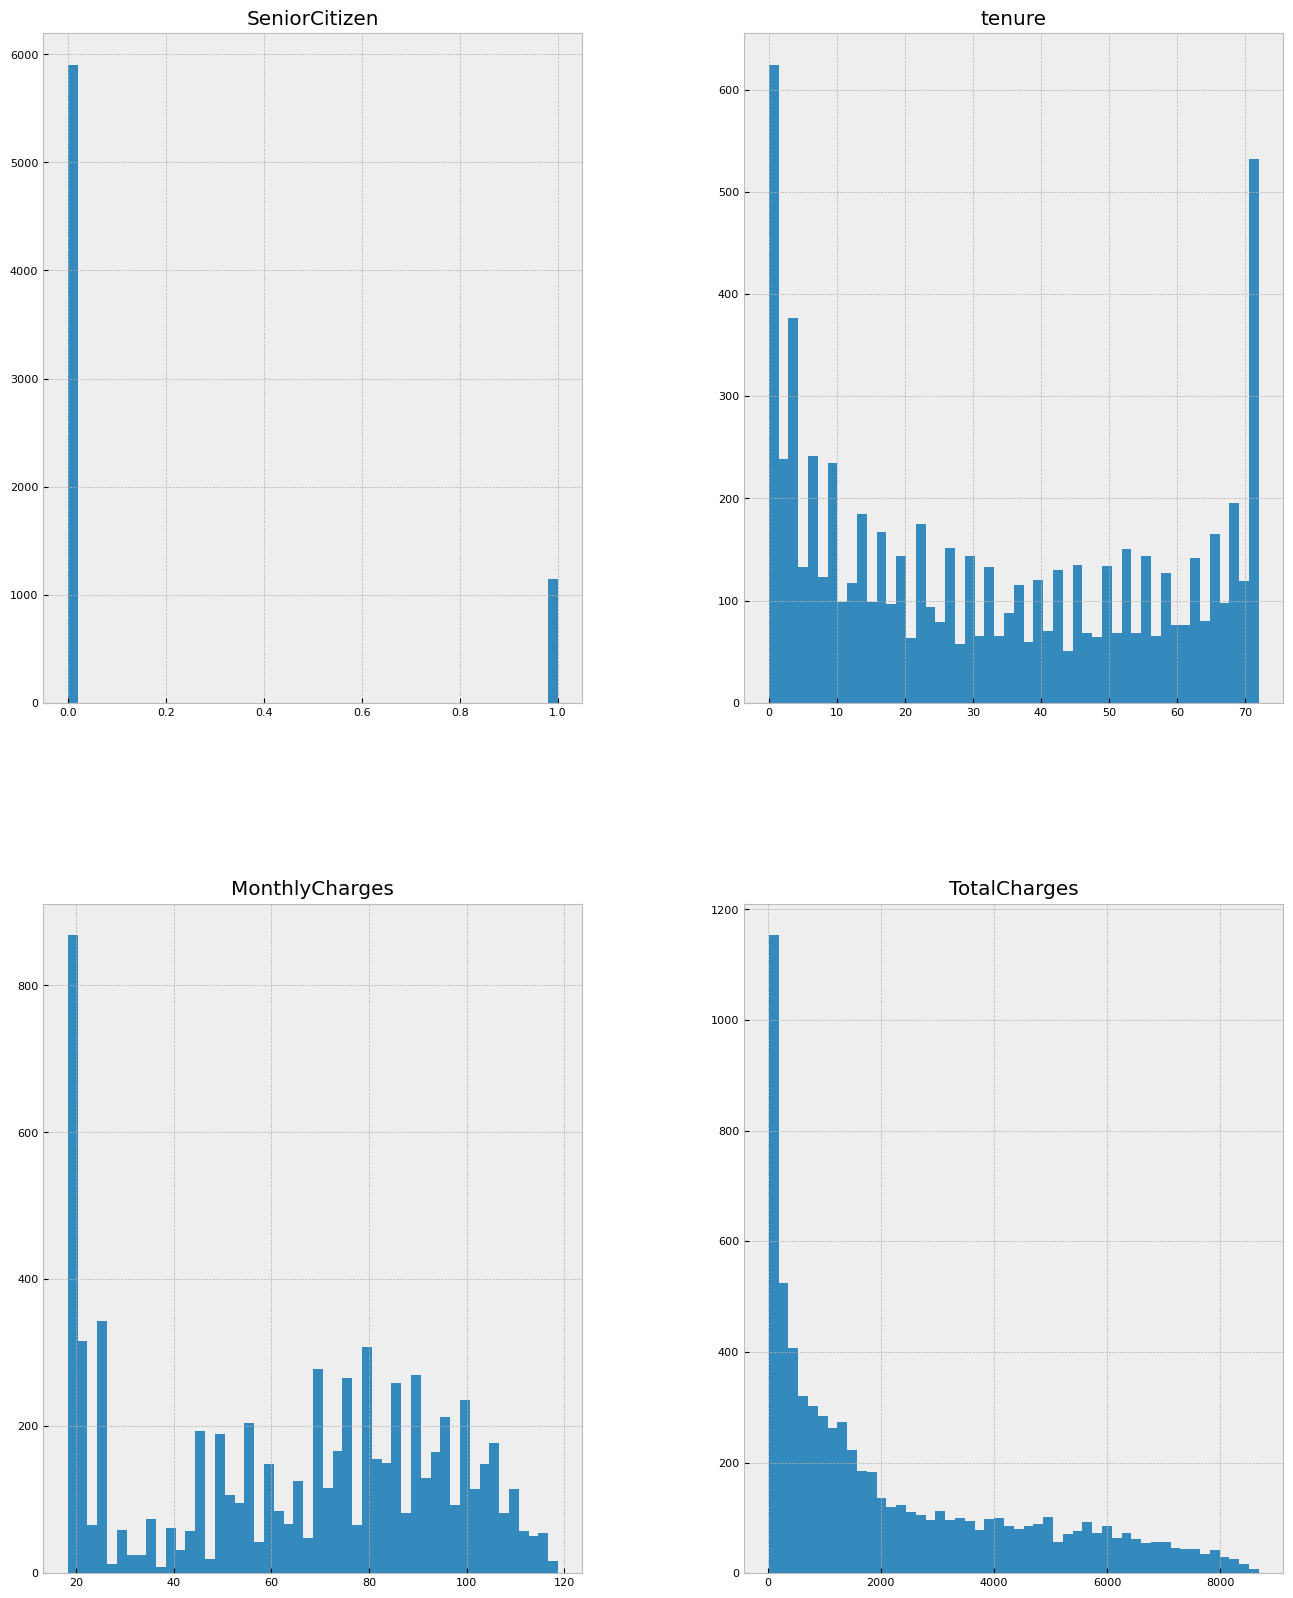

In [20]:
#univariate distributions for numerical features
num_feat.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

#### Observation: 
- Tenure: Many customers have either a very short tenure (close to 0 months) or a long tenure (close to 70 months). This indicates a bimodal distribution where there's a high churn rate for new customers and a stable customer base that has been with the company for a long time.
- MonthlyCharges: It was observed that a peak around the lower monthly charges and another peak in the higher range. This suggests that many customers opt for either basic services or premium services.
- TotalCharges: The distribution is right-skewed, indicating that a majority of customers have a lower total charge, which could be due to newer customers or customers with basic services.

### Bivariate Analysis

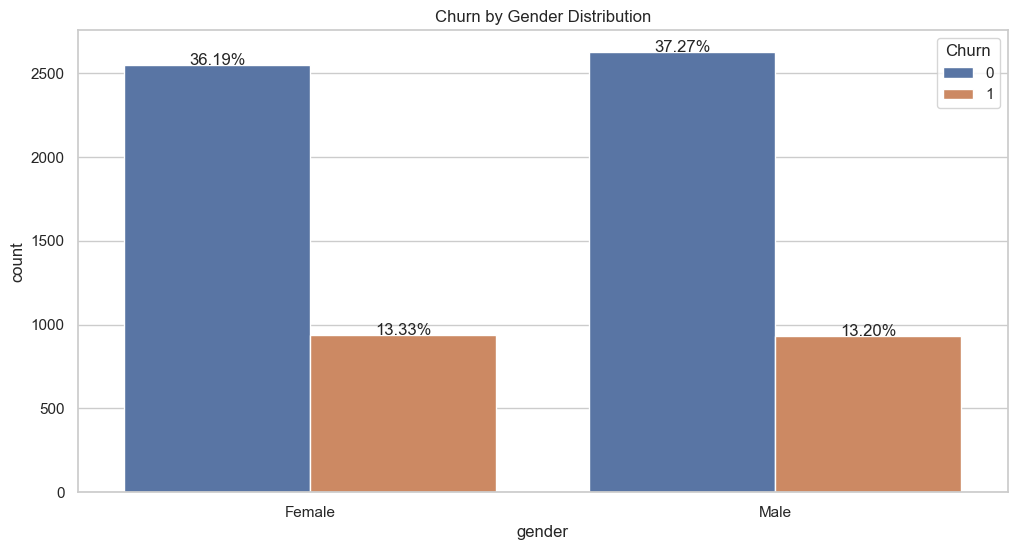

In [120]:
# distribution of Churn by Gender Distribution'
data['gender'] = data['gender'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by Gender Distribution')
ax = sb.countplot(x='gender', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()


## Observation
This analysis shows that almost the same number of male and female customers had churned. However, Female customers churned more at 13.33% compared to Male customers at 13.20%


Text(0.5, 1.0, 'Churn by Distribution of Monthly Charges')

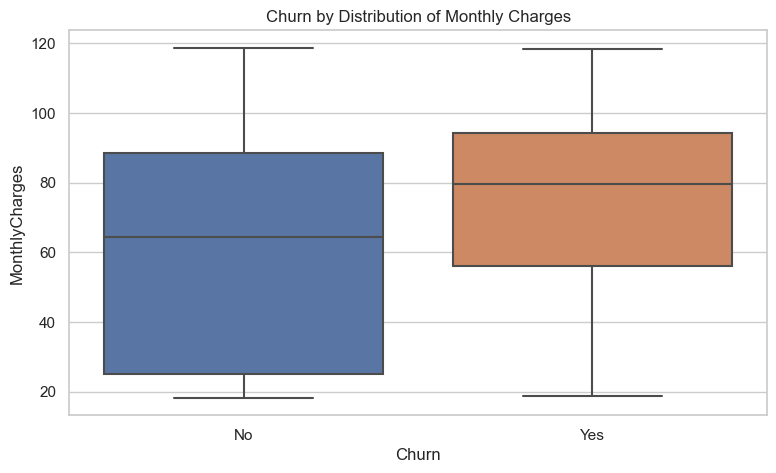

In [22]:
#distribution of the Monthly Charges feature vs Churn
plt.figure(figsize=(9,5))
sb.boxplot(data=data, y="MonthlyCharges",x="Churn")
plt.title('Churn by Distribution of Monthly Charges')

### Observation
- The median of the monthly charges for customers that had churned (yes) were more than those that had not churned (no), indicating the higher the monthly charges the more likely a customer would cancel his/her service. 


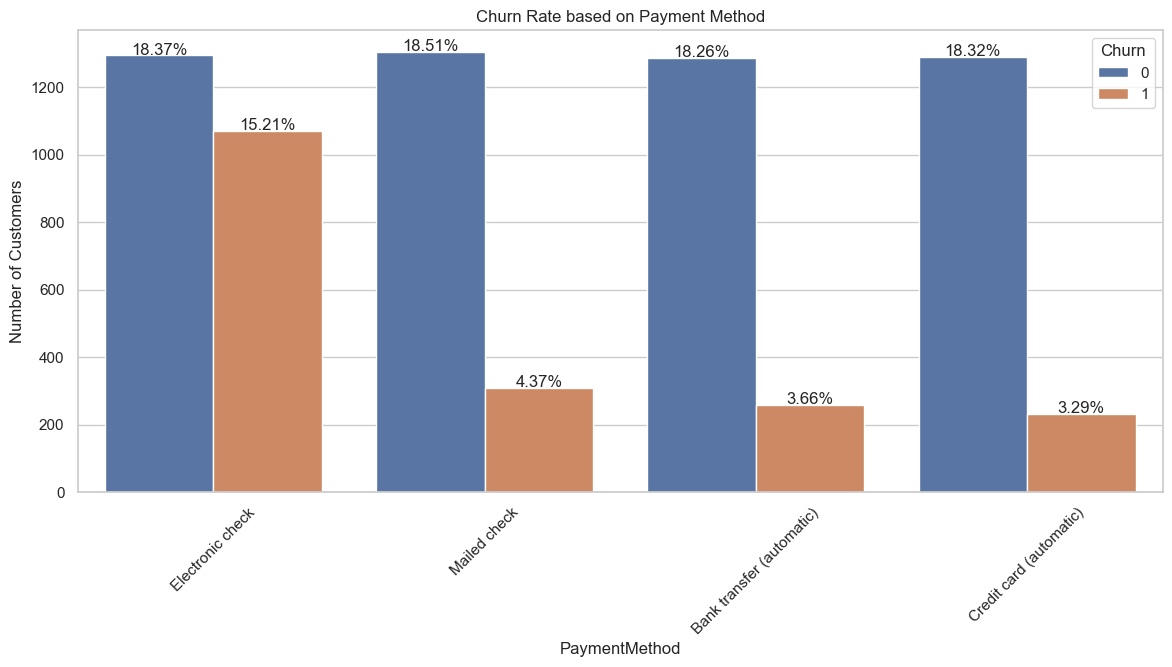

In [122]:
# Visualizing the churn rate based on PaymentMethod
plt.figure(figsize=(14, 6))
ax = sb.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.title('Churn Rate based on Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)


# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observations on Payment Method vs. Churn:

- Electronic Check: Customers using the electronic check as their payment method show a significantly higher churn rate at 15.21% compared to other methods. This could be due to various reasons, such as convenience issues or transaction problems.
- Mailed Check, Bank Transfer, and Credit Card: The churn rates for these methods are comparatively lower at 4.37%, 3.66% and 3.29% respectively. Automated methods like bank transfers and credit card payments might offer more convenience, leading to reduced churn.


#### The disparity in churn rates across different payment methods suggests that the company might benefit from promoting more stable and convenient payment methods. Encouraging customers to switch from electronic checks to automated methods could be a strategic move.

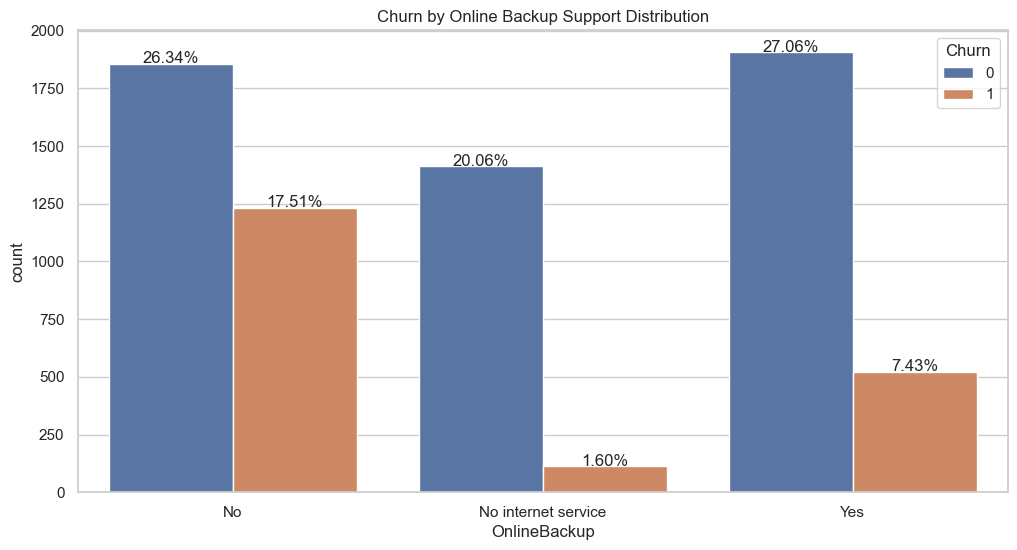

In [116]:
# distribution of Churn by Online Backup Support
data['OnlineBackup'] = data['OnlineBackup'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by Online Backup Support Distribution')
ax = sb.countplot(x='OnlineBackup', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers without any online back up service have the highest numbers of churn rate at 17.51% compared with those that have at 7.43%.

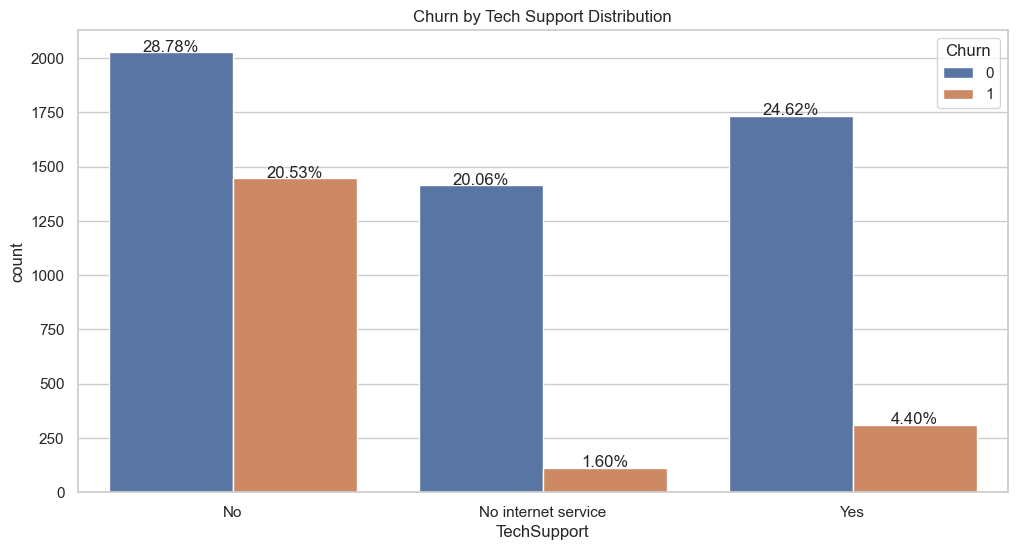

In [115]:
# distribution of Churn by Tech Support
data['TechSupport'] = data['TechSupport'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by Tech Support Distribution')
ax = sb.countplot(x='TechSupport', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
The Company is at risk of loosing customers who do not recieve any technical support, because this categories of customers have the highest numbers of churn rate.

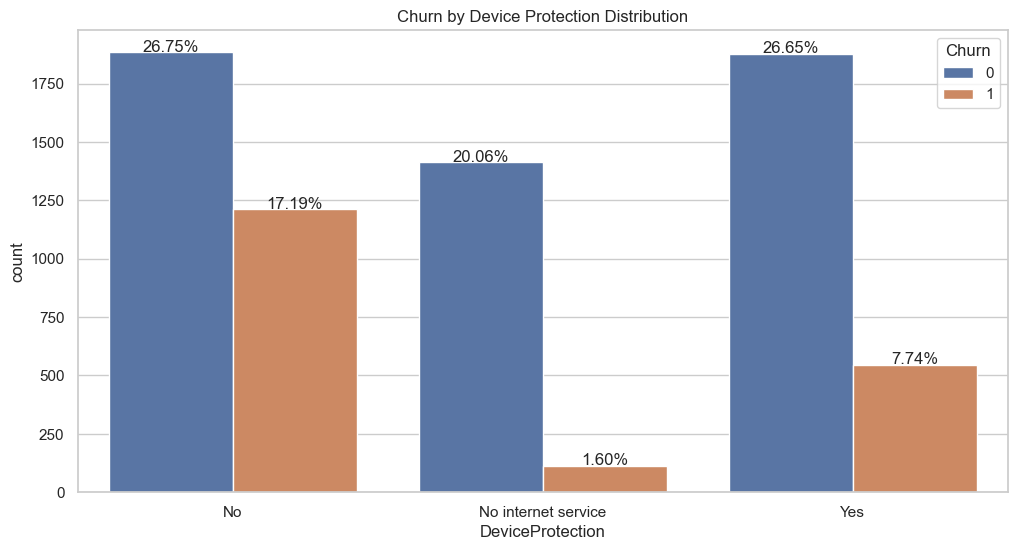

In [114]:
# distribution of Churn by Device Protection
data['DeviceProtection'] = data['DeviceProtection'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by Device Protection Distribution')
ax = sb.countplot(x='DeviceProtection', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers without any Device Protection have the highest numbers of churn rate at 17.19% compared to those that have at 7.74%.

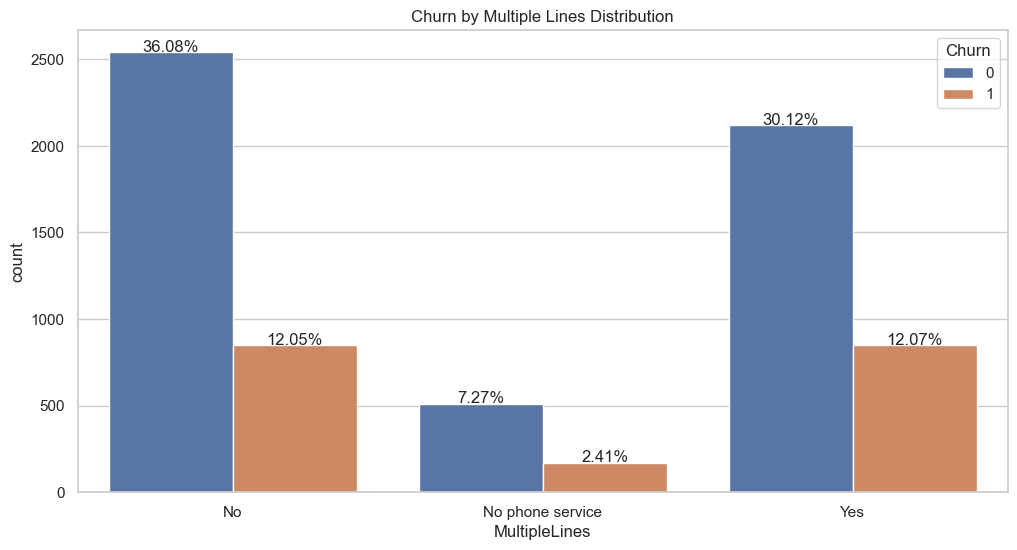

In [113]:
# distribution of Churn by Multiple Lines
data['MultipleLines'] = data['MultipleLines'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by Multiple Lines Distribution')
ax = sb.countplot(x='MultipleLines', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers with and without multiple lines have a very close churn rate at 12.07% and 12.05% respectively.

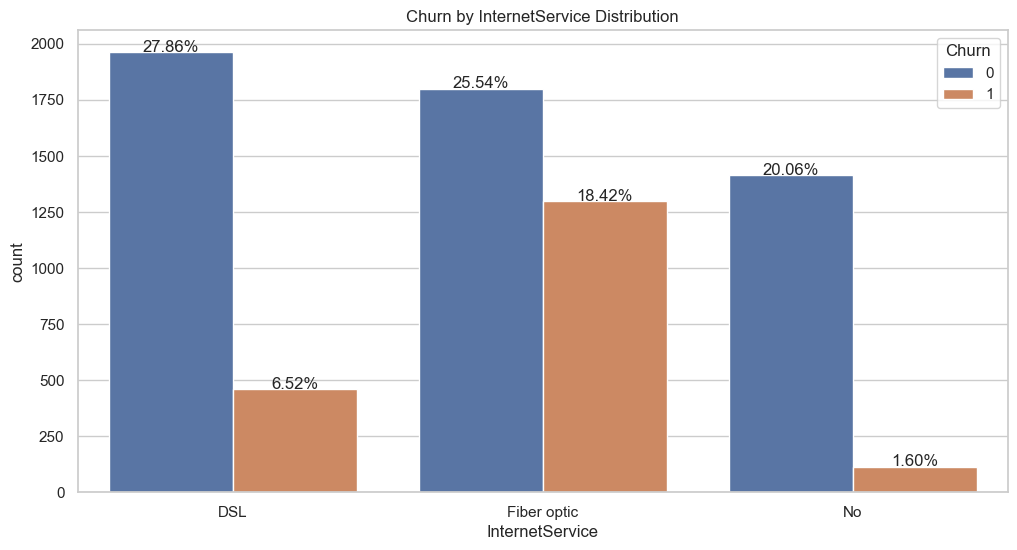

In [112]:
# distribution of Churn by Internet Service
data['InternetService'] = data['InternetService'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by InternetService Distribution')
ax = sb.countplot(x='InternetService', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers who subscribed with Fibre Optic has a higher churn rate at 18.42% than those with DSL at 6.52% and those without internet service at 1.60%.

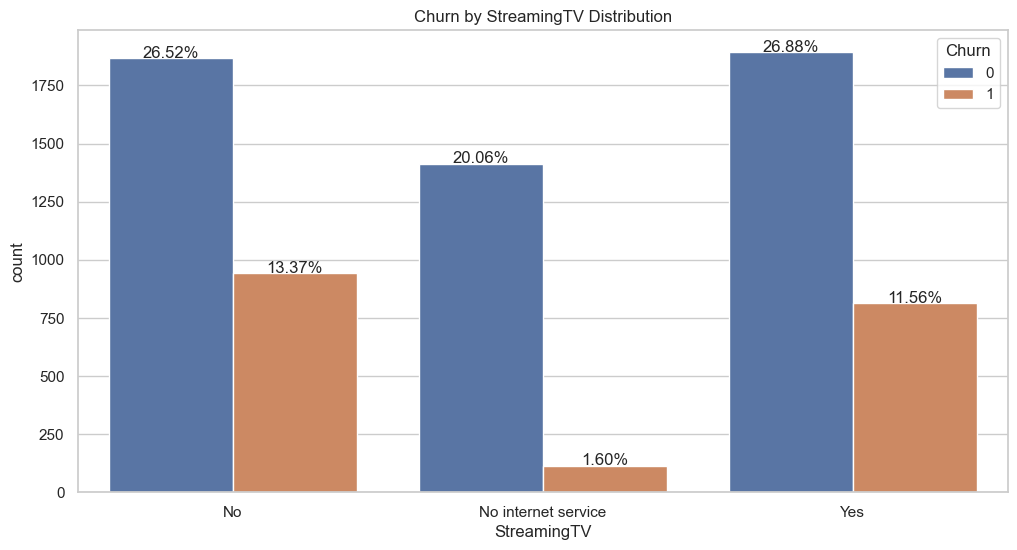

In [111]:
# distribution of Churn by StreamingTV
data['StreamingTV'] = data['StreamingTV'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by StreamingTV Distribution')
ax = sb.countplot(x='StreamingTV', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers who do not subscribed to streaming TV has a higher churn rate at 13.37% compared to those that subscribed at 11.56%. 

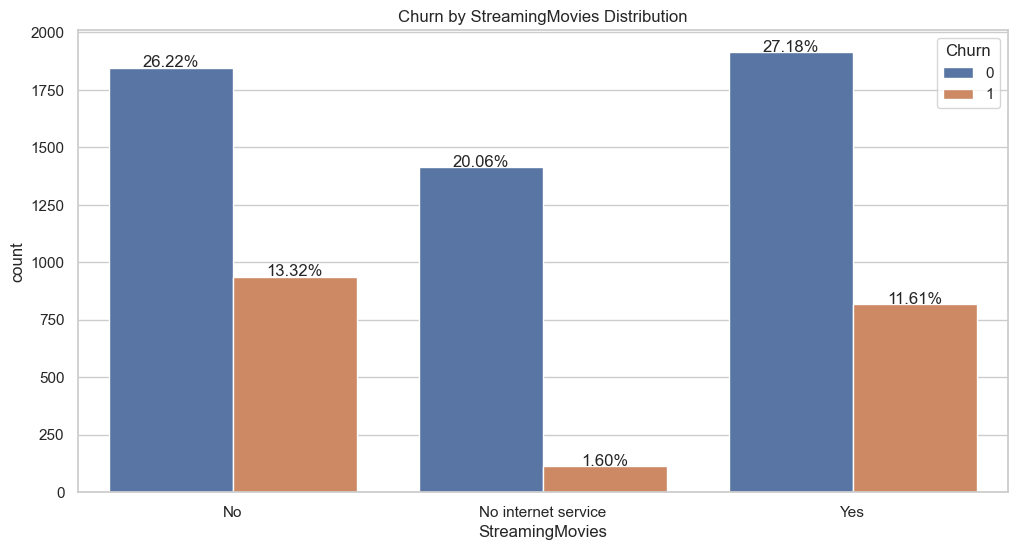

In [110]:
# distribution of Churn by StreamingMovies
data['StreamingMovies'] = data['StreamingMovies'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by StreamingMovies Distribution')
ax = sb.countplot(x='StreamingMovies', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers who do not subscribed to streaming movies has a higher churn rate at 13.32% compared to those that subscribed at 11.61%. 

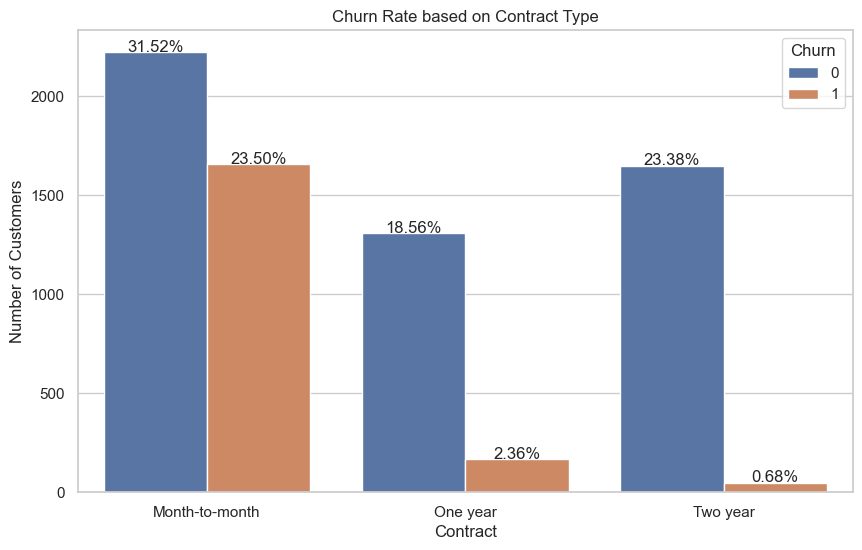

In [109]:
# Visualizing the churn rate based on Contract type
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=data, x='Contract', hue='Churn')
plt.title('Churn Rate based on Contract Type')
plt.ylabel('Number of Customers')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

#### Observations on Contract Type vs. Churn:

- Month-to-month Contracts: A significant number of customers on month-to-month contracts have churned at 23.50%. This is not surprising as these contracts offer flexibility, allowing customers to leave without long-term commitments.
- One-year and Two-year Contracts: The churn rate is notably lower for customers with one-year at 2.36% or two-year contracts at 0.68%. The longer-term nature of these contracts, possibly combined with benefits or discounts, seems to reduce the likelihood of customers leaving.


##### These insights suggest that while month-to-month contracts offer flexibility, they also pose a higher risk of churn. Strategies could involve enticing customers to opt for longer-term contracts with attractive offers or benefits, ensuring a more stable customer base.

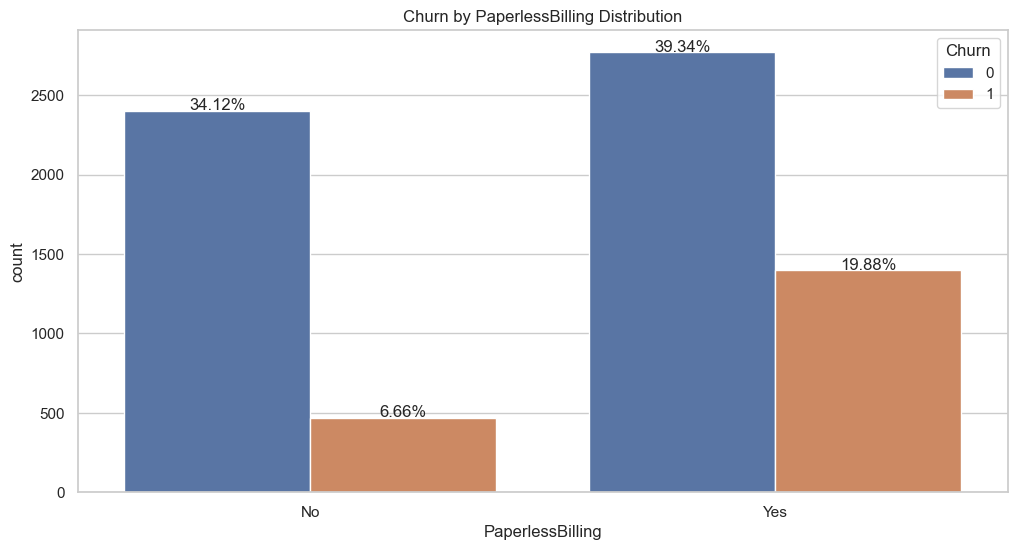

In [107]:
# distribution of Churn by PaperlessBilling
data['PaperlessBilling'] = data['PaperlessBilling'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Churn by PaperlessBilling Distribution')
ax = sb.countplot(x='PaperlessBilling', data=data, hue='Churn')

# Adding percentage labels
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

### Observation
Customers who uses Paperless Billing has a higher churn rate at 19.88% compared to those that were not used to paperless at 6.66%.

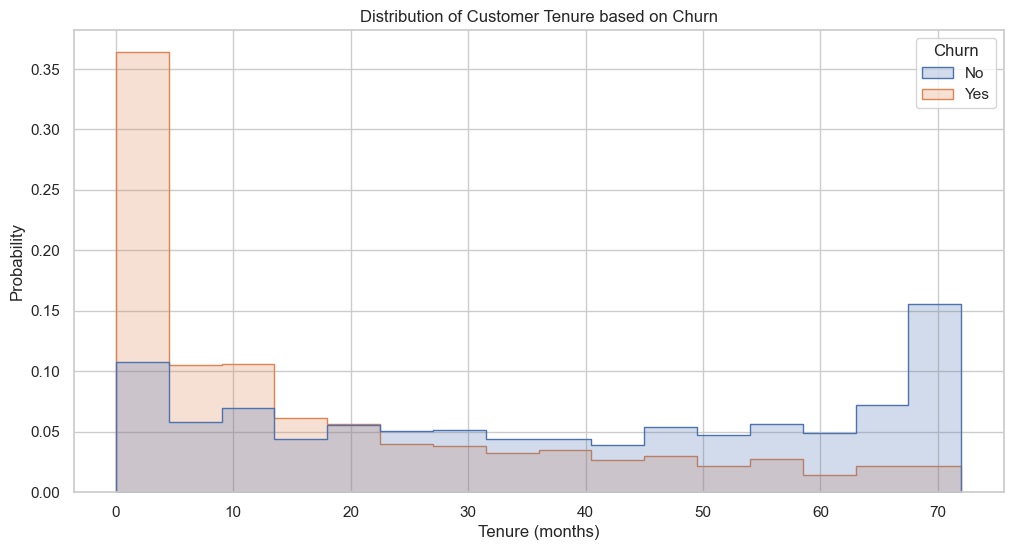

In [33]:
# Visualizing the distribution of Tenure based on Churn
plt.figure(figsize=(12, 6))
sb.histplot(data=data, x='tenure', hue='Churn', element='step', stat='probability', common_norm=False)
plt.title('Distribution of Customer Tenure based on Churn')
plt.ylabel('Probability')
plt.xlabel('Tenure (months)')
plt.show()

### Observation
- Short Tenure: Customers with a shorter tenure (fewer months with the company) have a higher likelihood of churning. This is evident from the elevated probability of churn among customers within the first few months.
- Long Tenure: On the other hand, as the tenure increases (customers who have been with the company for a longer duration), the probability of churn decreases significantly. This suggests that long-standing customers are more loyal and less likely to leave.

#### This insight can be valuable for the company. For instance, targeted interventions or offers can be made for newer customers to increase their likelihood of staying with the company beyond the initial months.

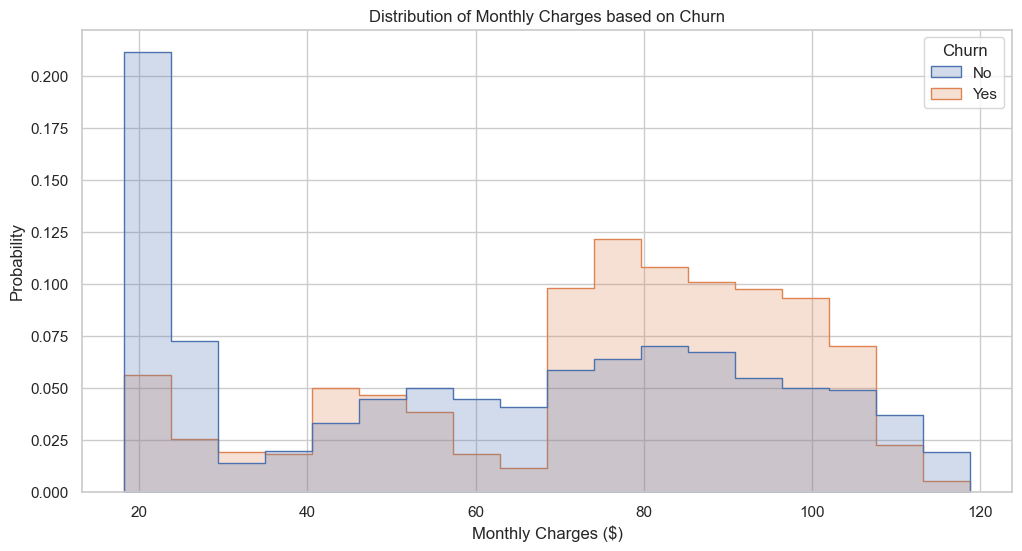

In [34]:
# Visualizing the distribution of MonthlyCharges based on Churn
plt.figure(figsize=(12, 6))
sb.histplot(data=data, x='MonthlyCharges', hue='Churn', element='step', stat='probability', common_norm=False)
plt.title('Distribution of Monthly Charges based on Churn')
plt.ylabel('Probability')
plt.xlabel('Monthly Charges ($)')
plt.show()

#### Observations on Monthly Charges vs. Churn:

- Lower Charges: For customers with lower monthly charges, there's a higher probability that they haven't churned. This suggests that many customers who are on lower-priced plans or services tend to stay with the company.
- Higher Charges: Conversely, there's a noticeable spike in churn probability for customers who face higher monthly charges. This indicates that customers paying higher fees are more likely to leave, possibly due to cost concerns or perceived lack of value.

#### This insight indicates that pricing strategies and value proposition are crucial. Customers might feel that they aren't getting value for their money at higher price points, leading to churn. Special attention should be given to this segment of customers, offering them deals, or understanding their needs better.

### Multivariate Analysis

Text(0.5, 1.0, 'Distribution of Monthly Charges by Payment Method by Churn')

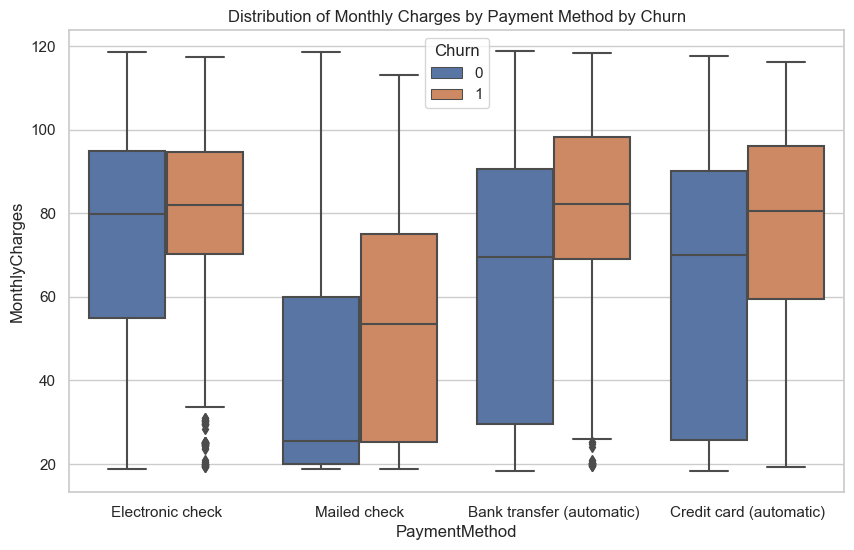

In [103]:
# Visualizing the distributions of the Monthly Charges featue vs Payment Method vs target feature
plt.figure(figsize = (10,6))
sb.boxplot(y='MonthlyCharges',x='PaymentMethod', hue='Churn',data=data)
plt.title('Distribution of Monthly Charges by Payment Method by Churn')

### Observation
- The median of the monthly charges of customers that had churned (yes) showed higher charges irrespective of the payment method than those that had not churned (no), indicating the higher the monthly charges the more likely a customer would cancel his/her service irrespective of the payment method.

Text(0.5, 1.0, 'Contract & MonthlyCharges vs Churn')

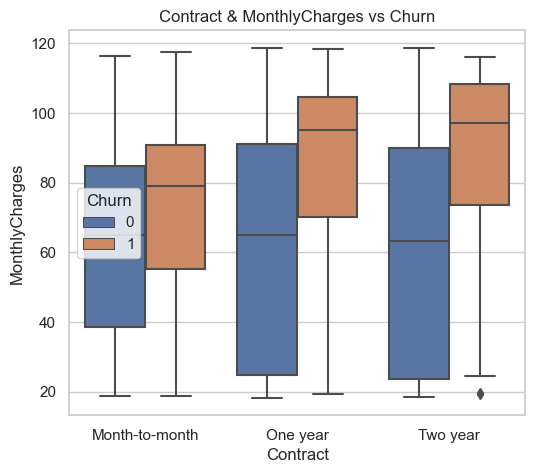

In [104]:
# Visualizing the distribution of Contract & MonthlyCharges with respect to Churn

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sb.boxplot(data=data, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Contract & MonthlyCharges vs Churn')


#### Observation:

- Customers on a month-to-month contract with higher monthly charges have a higher likelihood of churning.
- For longer contracts (one-year and two-year), the churn rate is lower, irrespective of the monthly charges

Text(0.5, 1.0, 'InternetService & MonthlyCharges vs Churn')

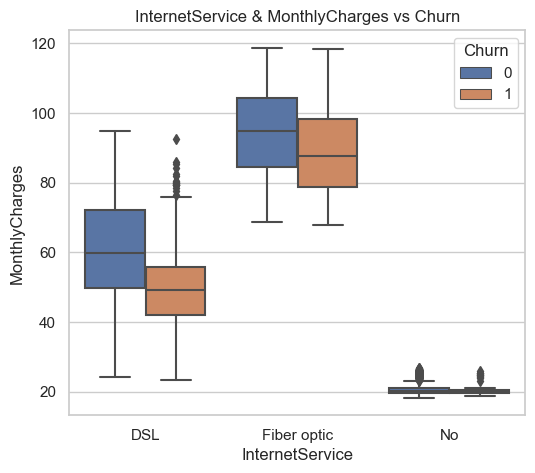

In [105]:
# Visualizing the distribution of InternetService & MonthlyCharges with respect to Churn

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='InternetService', y='MonthlyCharges', hue='Churn')
plt.title('InternetService & MonthlyCharges vs Churn')


#### Observation:

- Customers with fiber optic service and higher monthly charges seem to churn more.
- For DSL service, the churn rate is comparatively lower, even with higher charges. Customers without internet service have the lowest churn rate across different monthly charge levels.

Text(0.5, 1.0, 'tenure & MonthlyCharges vs Churn')

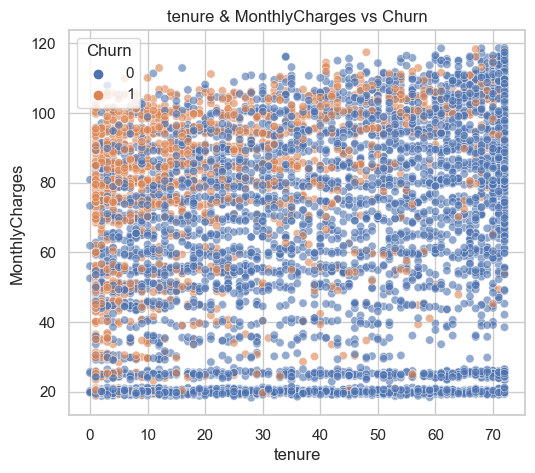

In [124]:
# Visualizing the distribution of tenure & MonthlyCharges with respect to Churn

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 3)
sb.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('tenure & MonthlyCharges vs Churn')


#### Observation

- There's a visible trend that customers with shorter tenures and higher monthly charges are more likely to churn.
- Customers with longer tenures, irrespective of the monthly charges, seem to have a lower churn rate.

Text(0.5, 1.0, 'tenure & TotalCharges vs Churn')

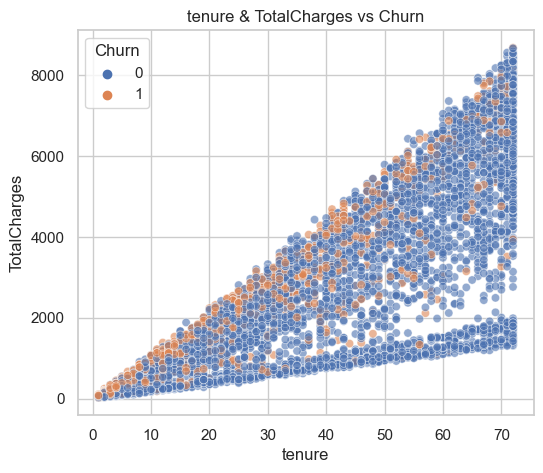

In [123]:
# Visualizing the distribution of tenure & TotalCharges with respect to Churn

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 3)
sb.scatterplot(data=data, x='tenure', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('tenure & TotalCharges vs Churn')

### Observation:
- There's a visible trend that customers with shorter tenures and lower total charges are more likely to churn.
- Customers with longer tenures and irrespective of their total charges, seem to have a lower churn rate.

Text(0.5, 1.0, 'TotalCharges & MonthlyCharges vs Churn')

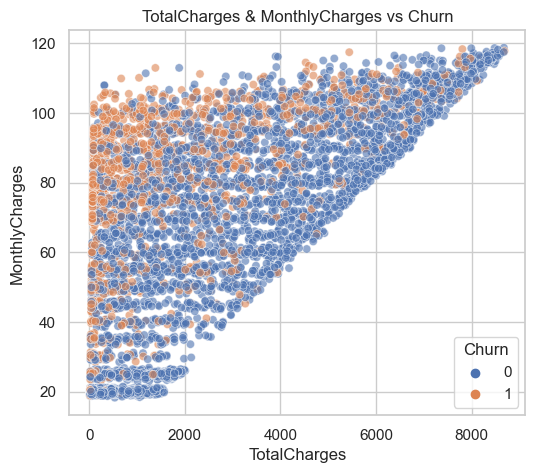

In [127]:
# Visualizing the distribution of MonthlyCharges & TotalCharges with respect to Churn

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 3)
sb.scatterplot(data=data, x='TotalCharges', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('TotalCharges & MonthlyCharges vs Churn')

### Observation:
- There's a visible trend that customers with higher monthly charges but lower total charges are more likely to churn.
- Customers with lower monthly charges, irrespective of their total charges, seemed to have a lower churn rate.

## Correlation: Exploring features that are strongly correlated 

In [39]:
# Compute the correlation matrix
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

correlation_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


#### Observation

##### The correlation matrix provides the following insights:

- tenure & MonthlyCharges: There's a positive correlation of approximately 0.248. This suggests a mild positive linear relationship between the tenure of a customer and the monthly charges they pay.
- tenure & TotalCharges: There's a strong positive correlation of approximately 0.826. This means that as the tenure of a customer increases, their total charges also tend to increase, which is expected since total charges accumulate over time.
- MonthlyCharges & TotalCharges: There's a positive correlation of approximately 0.651. This suggests that customers with higher monthly charges tend to have higher total charges over time.

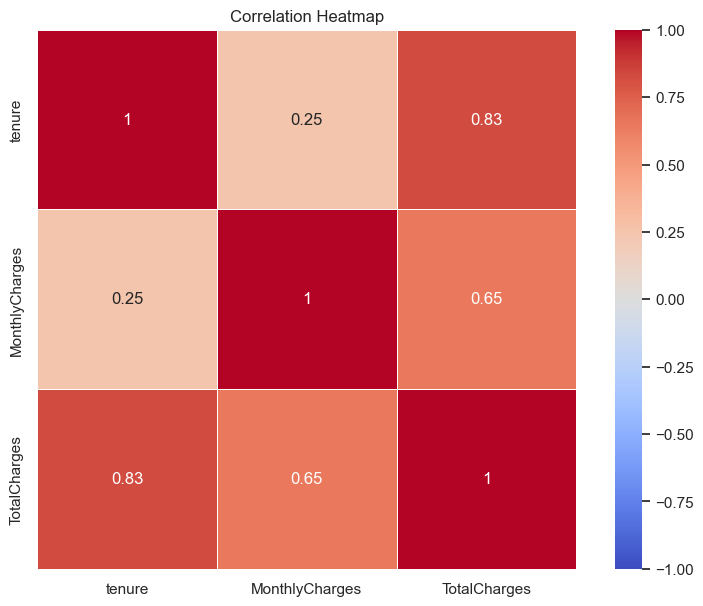

In [40]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Observation
- The color intensity and the annotation values together indicate the strength and direction of the correlation.
- Positive values (tending towards blue) indicate a positive correlation, while negative values (tending towards red) would indicate a negative correlation. In our case, all correlations are positive.
- The strong positive correlation between tenure and TotalCharges is evident from the intense color and high value.

## SUPERVISED ML SECTION
- DATA PROCESSING; -ENCODING,FEATURE-SCALING, DATA SPLITTING
- DATA MODELLING;
- METRICS EVALUATION; -f1, Confussion matrix, ClassificationReport
- CONCLUSIONS AND RECOMMENDATIONS

## Data Processing

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [50]:
#using the simple imputer to fill in all missing numerical data points
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
num_feat = pd.DataFrame(imputer.fit_transform(num_feat),columns=num_feat.columns)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature to numerical values
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [44]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [45]:
#segment our data into x dataset and target variable
x = data.drop('Churn',axis=1)
target = data['Churn']

In [46]:
#encoding other categorical features into numerical ones using one hot encoding(get_dummies)
data2 = pd.get_dummies(x,dtype='int64')
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
#scaling dataset
from sklearn.preprocessing import MinMaxScaler

#instanstiate our scaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data2)
#scaled_data

In [48]:
scaled_data

array([[0.        , 0.01388889, 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.02777778, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.15277778, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05555556, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91666667, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [81]:
#using the simple imputer to fill in all missing numerical data points
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
num_feat = pd.DataFrame(imputer.fit_transform(num_feat),columns=num_feat.columns)

In [82]:
#split data set into training and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.33, random_state=42)

In [83]:
X_train.shape

(4718, 7088)

In [84]:
X_test.shape

(2325, 7088)


#### BUILDING A BASE MODEL

In [85]:
### importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [86]:

from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform your test data using the same imputer
X_test_imputed = imputer.transform(X_test)

In [87]:
# instantiating our classifier models
lr_mod = LogisticRegression(max_iter=1000, random_state=42)
gn_mod = GradientBoostingClassifier()
rf_mod = RandomForestClassifier()
gb_mod = GaussianNB()
dt_mod = DecisionTreeClassifier()
sv_mod = SVC()
kn_mod = KNeighborsClassifier()

#fitting and training our classifier models
lr_mod.fit(X_train_imputed,y_train)
gn_mod.fit(X_train_imputed,y_train)
rf_mod.fit(X_train_imputed,y_train)
gb_mod.fit(X_train_imputed,y_train)
dt_mod.fit(X_train_imputed,y_train)
sv_mod.fit(X_train_imputed,y_train)
kn_mod.fit(X_train_imputed,y_train)

KNeighborsClassifier()

In [88]:
# Creating predictions
pred_lr = lr_mod.predict(X_test_imputed)
pred_gn = gn_mod.predict(X_test_imputed)
pred_rf = rf_mod.predict(X_test_imputed)
pred_gb = gb_mod.predict(X_test_imputed)
pred_dt = dt_mod.predict(X_test_imputed)
pred_sv = sv_mod.predict(X_test_imputed)
pred_kn = kn_mod.predict(X_test_imputed)

#### MODEL EVALUATION

In [89]:
#printing out the model accuracy score of our classifier
lr_score = lr_mod.score(X_test_imputed,y_test)
gn_score = gn_mod.score(X_test_imputed,y_test)
rf_score = rf_mod.score(X_test_imputed,y_test)
gb_score = gb_mod.score(X_test_imputed,y_test)
dt_score = dt_mod.score(X_test_imputed,y_test)
sv_score = sv_mod.score(X_test_imputed,y_test)
kn_score = kn_mod.score(X_test_imputed,y_test)

print(f"model accurcay score for Logistic Regression is: {lr_score}")
print(f"model accurcay score for GradientBoostingClassifier is: {gn_score}")
print(f"model accurcay score for RandomForestClassifier is: {rf_score}")
print(f"model accurcay score for Naive bayes is {gb_score}:")
print(f"model accurcay score for DecisionTreeClassifier is: {dt_score}")
print(f"model accurcay score for SVC is: {sv_score}")
print(f"model accurcay score for KNeighborsClassifier is: {kn_score}")

model accurcay score for Logistic Regression is: 0.8159139784946237
model accurcay score for GradientBoostingClassifier is: 0.8098924731182796
model accurcay score for RandomForestClassifier is: 0.7944086021505377
model accurcay score for Naive bayes is 0.2701075268817204:
model accurcay score for DecisionTreeClassifier is: 0.7698924731182796
model accurcay score for SVC is: 0.8090322580645162
model accurcay score for KNeighborsClassifier is: 0.7591397849462366


In [90]:
#importing evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
#classification report for logistic regression
print(f"model accurcay score for Logistic Regression is: {lr_score}\n")
print("Logistic Regression Model Report: \n ",classification_report(y_test, pred_lr))

model accurcay score for Logistic Regression is: 0.8159139784946237

Logistic Regression Model Report: 
                precision    recall  f1-score   support

           0       0.85      0.90      0.88      1697
           1       0.69      0.58      0.63       628

    accuracy                           0.82      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.82      0.81      2325



In [92]:
# helpful function to plot out a confussion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

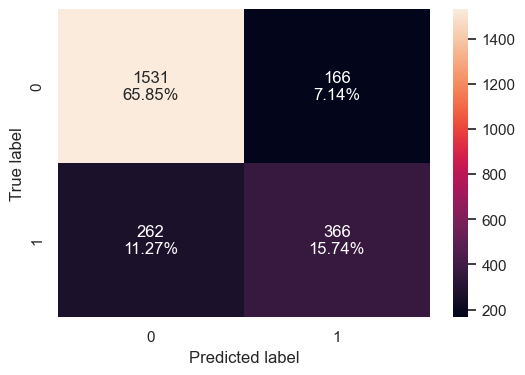

In [93]:
confusion_matrix_sklearn(lr_mod,X_test_imputed,y_test)

In [94]:
#classification report for logistic regression
print(f"model accurcay score for GradientBoostingClassifier is: {gn_score}\n")
print("Gradient Boosting Classifier Report: \n ",classification_report(y_test, pred_gn))

model accurcay score for GradientBoostingClassifier is: 0.8098924731182796

Gradient Boosting Classifier Report: 
                precision    recall  f1-score   support

           0       0.84      0.92      0.88      1697
           1       0.70      0.52      0.60       628

    accuracy                           0.81      2325
   macro avg       0.77      0.72      0.74      2325
weighted avg       0.80      0.81      0.80      2325



In [95]:
# helpful function to plot out a confussion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

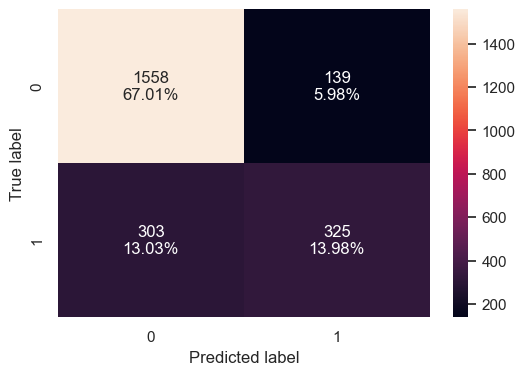

In [96]:
confusion_matrix_sklearn(gn_mod,X_test_imputed,y_test)

In [97]:
#classification report for logistic regression
print(f"model accurcay score for RandomForestClassifier is: {gn_score}\n")
print("Random Forest Classifier Report: \n ",classification_report(y_test, pred_rf))

model accurcay score for RandomForestClassifier is: 0.8098924731182796

Random Forest Classifier Report: 
                precision    recall  f1-score   support

           0       0.82      0.92      0.87      1697
           1       0.68      0.46      0.55       628

    accuracy                           0.79      2325
   macro avg       0.75      0.69      0.71      2325
weighted avg       0.78      0.79      0.78      2325



In [98]:
# helpful function to plot out a confussion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

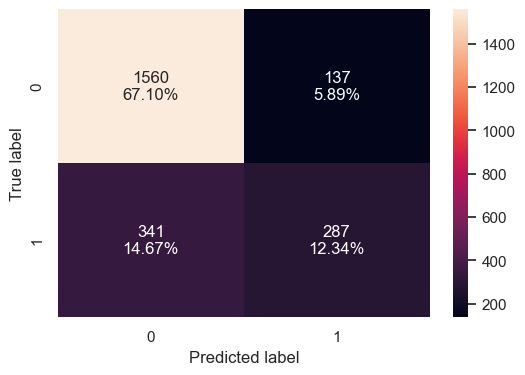

In [99]:
confusion_matrix_sklearn(rf_mod,X_test_imputed,y_test)


### observations
- we can identify the best performing model(Logistics Regression) with an accuracy score of 0.82,  having an r score of 0.90, which goes to show that in comparison to the other models, this model fits the data better


## Conclusion:
- Churn Rate and Impact: The dataset revealed a significant proportion of customers churning. This not only leads to a loss of revenue but also increases acquisition costs if the company aims to replace these customers.

#### Key Features Impacting Churn:

- Contract Type: Customers with month-to-month contracts were more likely to churn compared to those with longer-term contracts.
- Monthly Charges: A positive correlation was observed between monthly charges and churn. Customers with higher monthly charges were more prone to churn, suggesting potential dissatisfaction with the perceived value they receive.
- Tenure: A negative correlation between tenure and churn was noted. Newer customers are more likely to churn, which might be due to initial service dissatisfaction or better offers from competitors.
- Model Performance: The Logistic Regression model served as a baseline model with the highest accuracy of 82%, with key metrics like precision (0.84), recall (0.90), and the ROC curve indicating its performance. While the model showed promising results, there's room for improvement.

## Recommendations:
- Customer Retention Initiatives: Given the high churn among month-to-month contract customers, the company should consider launching targeted retention initiatives. This could include special offers, discounts, or bundled services to encourage these customers to transition to longer-term contracts.

- Re-evaluate Pricing Strategy: The positive correlation between monthly charges and churn suggests that some customers might perceive the services as not providing enough value for the price. The company should consider a competitive analysis of pricing versus service offerings and adjust if necessary.

- Onboarding Experience: The higher churn rate among newer customers could be indicative of gaps in the onboarding experience. Investing in a smoother onboarding process, including initial customer support and service set-up, can reduce early-stage churn.

- Advanced Modeling: While the Logistic Regression model has the best accuracy, implementing techniques like hyperparameter tuning and feature selection can further optimize the models.

- Feedback Loop: Implement mechanisms to gather feedback from churning customers. Understanding their reasons for leaving can offer invaluable insights for targeted retention strategies.

- Continuous Monitoring: Set up a system to continuously monitor churn rates and model predictions. Regularly updating the model with fresh data ensures its predictive accuracy remains high.

- Engage and Educate: Engage customers through regular communications, updates, and education about new features or services. Ensuring customers fully utilize and understand the services they're paying for can enhance satisfaction and reduce churn.

- By addressing these areas, the company can not only reduce its churn rate but also enhance overall customer satisfaction and loyalty.